In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv(r'/Users/jitendrashirsat/Documents/Time-Series/TimeSeries/Lessons/airline_passengers.csv' \
            ,index_col='Month',parse_dates=True)

In [3]:
df.head(4)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129


<AxesSubplot:xlabel='Month'>

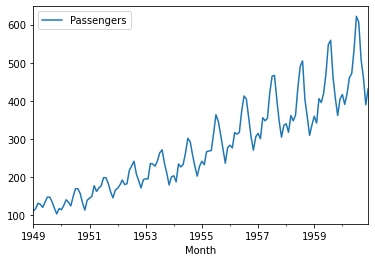

In [4]:
df.plot()

In [5]:
adfuller(df['Passengers'])

(0.8153688792060544,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [6]:
def adf(x):
    res = adfuller(x)
    print('Test statistics:', res[0])
    print('P values:', res[1])
    
    if res[1] < 0.05:
        print("Stationarity")
    else:
        print("Non-Stationarity")

In [7]:
adf(df['Passengers'])

Test statistics: 0.8153688792060544
P values: 0.9918802434376411
Non-Stationarity


In [8]:
df["LogPassengers"] = np.log(df["Passengers"])

In [9]:
adf(df['LogPassengers'])

Test statistics: -1.7170170891069625
P values: 0.4223667747703904
Non-Stationarity


In [10]:
df["Diff"] = df["Passengers"].diff()

<AxesSubplot:xlabel='Month'>

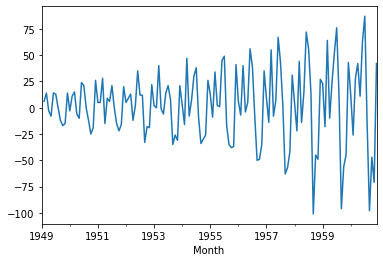

In [11]:
df["Diff"].plot()

In [14]:
adf(df['Diff'].dropna())

Test statistics: -2.8292668241700034
P values: 0.054213290283824954
Non-Stationarity


In [15]:
df["DiffLog"] = df["LogPassengers"].diff()

<AxesSubplot:xlabel='Month'>

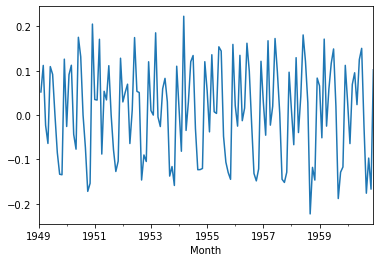

In [16]:
df['DiffLog'].plot()

In [17]:
adf(df['DiffLog'].dropna())

Test statistics: -2.7171305983881595
P values: 0.07112054815085424
Non-Stationarity
